In [58]:
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
import pandas as pd
from sklearn.datasets import make_classification
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt

In [ ]:

def knn(patient_to_predict, trails, trial_names, k):
    """Find the k nearest clinical trials for a single patient (Euclidean distance)."""
    distances_list = [np.linalg.norm(patient_to_predict - trail) for trail in trails]
    nearest_indices = np.argsort(distances_list)[:k]
    return [(trial_names[i], distances_list[i]) for i in nearest_indices]


def knn_multiple_patients(patients, trails, trial_names, k):
    """Apply KNN matching for a list of patients."""
    return [knn(pt, trails, trial_names, k) for pt in patients]


# decisiontree

def train_decision_tree(features, labels, max_depth=3, criterion="entropy"):
    """Train a Decision Tree classifier and print hold‑out accuracy."""
    X_train, X_test, y_train, y_test = train_test_split(
        features, labels, test_size=0.2, random_state=42
    )
    clf = DecisionTreeClassifier(max_depth=max_depth, criterion=criterion, random_state=42)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(f"Decision Tree accuracy: {accuracy_score(y_test, y_pred):.2f}")
    return clf


def predict_decision_tree(clf, features):
    """Predict labels for new data using a trained Decision Tree."""
    return clf.predict(features)

In [46]:



def knn(patient_to_predict, trails, trial_names, k):
    """
    Find the k nearest clinical trials for a single patient using Euclidean distance.
    :param patient_to_predict: numpy array shape (n_features,)
    :param trails: numpy array shape (n_trials, n_features)
    :param trial_names: list of trial identifiers
    :param k: number of neighbors to retrieve
    :return: list of (trial_name, distance) for k closest trials
    """
    distances_list = []
    for trail in trails:
        distance = np.linalg.norm(patient_to_predict - trail)
        distances_list.append(distance)
    nearest_indices = np.argsort(distances_list)[:k]
    best_trials = [(trial_names[i], distances_list[i]) for i in nearest_indices]
    return best_trials


def knn_multiple_patients(patients, trails, trial_names, k):
    """
    Apply KNN matching for a list of patients.
    :param patients: numpy array shape (n_patients, n_features)
    :param trails: numpy array shape (n_trials, n_features)
    :param trial_names: list of trial identifiers
    :param k: number of neighbors
    :return: list of lists of best trials per patient
    """
    patients_with_ct = []
    for unique_patient in patients:
        matches = knn(unique_patient, trails, trial_names, k)
        patients_with_ct.append(matches)
    return patients_with_ct


# ------------------ Decision Tree ------------------

def train_decision_tree(features, labels, max_depth=3, criterion='entropy'):
    """
    Train a Decision Tree classifier on provided feature matrix and labels.

    :param features: array-like, shape (n_samples, n_features)
    :param labels: array-like, shape (n_samples,)
    :param max_depth: maximum depth of the tree
    :param criterion: splitting criterion ('gini' or 'entropy')
    :return: trained DecisionTreeClassifier
    """
    # split into train/test sets for evaluation
    X_train, X_test, y_train, y_test = train_test_split(
        features, labels, test_size=0.2, random_state=42
    )
    clf = DecisionTreeClassifier(max_depth=max_depth, criterion=criterion)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(f"Decision Tree accuracy: {accuracy_score(y_test, y_pred):.2f}")
    return clf


def predict_decision_tree(clf, features):
    """
    Use a trained Decision Tree to predict labels for new data.

    :param clf: DecisionTreeClassifier
    :param features: array-like, shape (n_samples, n_features)
    :return: array of predictions
    """
    return clf.predict(features)




In [54]:
def visualize_decision_tree(clf, feature_names=None, class_names=None, figsize=(18, 8), save_path=None):
    """Plot the trained Decision Tree.

    Parameters
    ----------
    clf : DecisionTreeClassifier
        A fitted decision tree.
    feature_names : list[str] | None
        Optional list of feature names (length == n_features).
    class_names : list[str] | None
        Optional list of class names (length == n_classes).
    figsize : tuple[int, int]
        Size of the matplotlib figure.
    save_path : str | None
        If given, save the figure instead of showing it interactively.
    """
    plt.figure(figsize=figsize)
    plot_tree(
        clf,
        feature_names=feature_names,
        class_names=class_names,
        filled=True,
        rounded=True,
        fontsize=10,
    )
    plt.tight_layout()
    if save_path:
        plt.savefig(save_path, bbox_inches="tight")
    else:
        plt.show()

In [55]:
patient_df = pd.read_csv("/Users/neyonought/Documents/CS4100-Clinical-Trial-Matchmaking/data/patient_embeddings.csv")
trial_df = pd.read_csv("/Users/neyonought/Documents/CS4100-Clinical-Trial-Matchmaking/data/trial_embeddings.csv")

Decision Tree accuracy: 1.00
Predictions for demo pairs: [1 1 1 0 1]


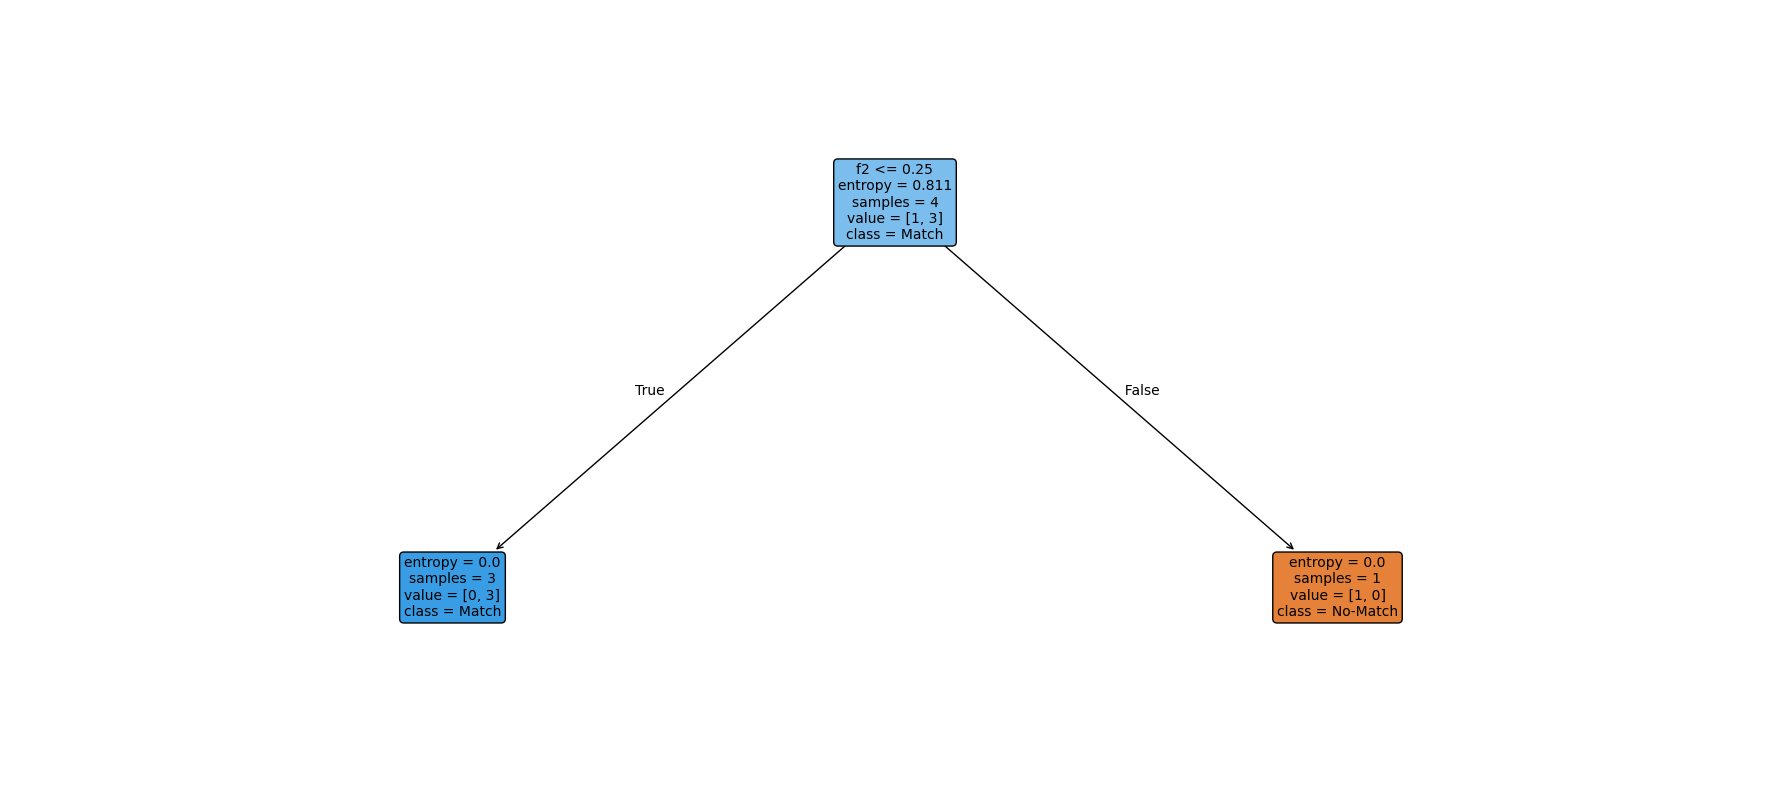

In [60]:
if __name__ == "__main__":
    # Example usage with placeholder data
    # Load embeddings from CSV
    patient_embeds = patient_df.iloc[:, 1:].values
    trial_embeds = trial_df.iloc[:, 1:].values
    n_pairs = min(len(patient_embeds), len(trial_embeds))

    # Simple feature: absolute difference between patient & trial vectors
    features = np.abs(patient_embeds[:n_pairs] - trial_embeds[:n_pairs])

    # Dummy labels – replace with real match labels (1 = match, 0 = no‑match)
    labels = np.random.randint(0, 2, size=n_pairs)

    clf = train_decision_tree(features, labels, max_depth=3)

    preds = predict_decision_tree(clf, features)
    print("Predictions for demo pairs:", preds)

    # Visualise the trained tree
    visualize_decision_tree(
        clf,
        feature_names=[f"f{i}" for i in range(features.shape[1])],
        class_names=["No‑Match", "Match"],
    )


In [ ]:
X, y = make_classification(n_samples=500,
                           n_features=10,
                           n_informative=6,
                           n_redundant=0,
                           random_state=42)
clf = train_decision_tree(X, y, max_depth=5)

Decision Tree accuracy: 0.74
